# Today, a Tale About Python and Pandas
![pandas](https://miro.medium.com/max/1400/1*6d5dw6dPhy4vBp2vRW6uzw.png)

# Introduction

### Recap
The course discussed 
- the basics of **programming** in Python 
- elementary tools for **text processing**

"Text" came primarily in the form of string variables or `.txt` files.

### On Today's Plate: Data Formats and Access

- In practice, you'll encounter text in many different **formats**: CSV, XML, HTML or JSON. 

- Also, you can access text in different ways
    - reading content from a local file
    - retrieving data via an API
    - scraping information from the web.

(Don't worry if these notions don't make sense at this point, we will cover them in more detail soon!)



In short: today we talk about data formats and access...
    
![img](https://media.giphy.com/media/3d5O10XObbr8LW4bDY/giphy.gif)

 ... but also start exploring more realistic research scenarios using our novel computational skills!
 
 ![img](https://media.giphy.com/media/UuebWyG4pts3rboawU/giphy.gif)

# Data Classification

## (Un)structured Data


- Structure relates to the degree of organization (of information).
- Text (or a str object in Python) is often referred to as "unstructured data" as it is just a sequence of characters

In [8]:
text = 'This is not a sentence.'

✏️ **Exercises:** 
- To refresh your memory and awaken your fingers: how many charaters does the variable `text` contain? 
- What is the first and last element of the `text` variable?

In [9]:
# Enter solution here

To better understand the different between structured and unstructured information, compare the following representation of two person's age and place of birth.

In [17]:
text = 'Thomas (age 46) was born in Germany. Betsy was two year younger and grew up in the States.'

In [18]:
import pandas as pd
df = pd.DataFrame([['Thomas',46,'Germany'],['Betsy',44,'United States']],columns=['name','age','born'],index=[1,2])
df

,name,age,born
1,Thomas,46,Germany
2,Betsy,44,United States



Why is it important? 
- Degree of organisation affects how we can read, process, and store data.
- Working with text is often difficult as it lacks prior structure we can use analysis or data manipulation
- Structured information (i.e. spreadsheets) is most amenable to quantitative analysis, but also a very abstract representation of information (there is a trade-off).

## Semi-structured Data

- Often, data do not neatly fit the structured and unstructured dichotomy
- Instead positioned on a continuous scale
- Semi-structured information has some structured element but is not a rigorously organized as a spreadsheet.


In [52]:
xml = """<bio><name>Thomas<\name> (age <age>46</age>) was born in <country>Germany</country>. 
    <name>Betsy</name> was <age>two years younger</age> and grew up in the <country>States</country>.</bio>"""



### Take-aways: 
- Lost in Translation?: Research at scale often involves some transformation of (semi or unstructured) text to a structured representation (text-as-data).
- Trade-off between structure and abstraction: the right representation of your data depends on your research quesstion!



### Next:
Study different formats in which you will encounter text documents
- CSV 
- XML/HTML
- JSON

# Tabular data

Today we first focus on working with text in a **tabular** format. 
- organized in rows (observations) and columns (features/attributes of these observations)
- structured data stored in a CSV format (Comma Separated Values)

Let's have a look at an example file, a list of names from the 1880s. We can open this `.txt` file as we have previously done. 

In [53]:
names_example = open('data/names_extract.txt').read(); names_example

'year,name,sex,frequency\n1880,Mary,F,7065\n1880,Anna,F,2604\n1880,Emma,F,2003\n1880,Elizabeth,F,1939\n1880,Minnie,F,1746\n1880,Margaret,F,1578\n1880,Ida,F,1472\n1880,Alice,F,1414\n1880,Bertha,F,1320\n1880,Sarah,F,1288\n1880,Annie,F,1258\n1880,Clara,F,1226\n1880,Ella,F,1156\n1880,Florence,F,1063\n1880,Cora,F,1045\n1880,Martha,F,1040\n1880,Laura,F,1012\n1880,Nellie,F,995\n1880,Grace,F,982\n1880,Carrie,F,949\n1880,Maude,F,858\n1880,Mabel,F,808\n1880,Bessie,F,796\n1880,Jennie,F,793\n1880,Gertrude,F,787\n1880,Julia,F,783\n1880,Hattie,F,769\n1880,Edith,F,768\n1880,Mattie,F,704'

In [34]:
type(names_example)

str

Even though I refered to the CSV file as structured or tabular, it as actually stored a unstructered text file. But as you have undoubtedly noticed, the `str` object confirms to implicit pattern. 
- rows end with a hard return `\n`
- cells are separated by a comma (delimiter = ',', but a convention, e.g. tsv files have `\t` or tab to separate cells)

Converting a string to a structured and machine readable format is called "parsing".

✏️ **Exercise:**: Can you write a parser function called `csv_parser` that given an input string returns a dataframe in the shape of a nested list, i.e.:
- in goes: 
```python
csv_text = 'c1,c2,c3\n1,2,3'
```

- out goes:
```python
[['c1','c2','c3'],['1','2','3']]
```

- apply csv_parser to the `names_example` variable and save it in a new variable `names_parsed`.

In [35]:
# Write your answer here

In [40]:
def csv_parser(input_string: str) -> list:
    """
    Argument:
        input_string (str): CSV string
    Returns:
        a nested list 
    """
    lines = input_string.split('\n')
    cells = [l.split(',') for l in lines]
    return cells

names_parsed = csv_parser(names_example)

Previous code allowed you to "parse" as CSV files, but a nested list not the most convenient way of working with tabular data.

You can retrieve rows (and cells within rows) but other useful operation appear more difficult: for examle accessing the data column-wise, i.e. get all names. 


✏️ **Exercise:**: 
- How many rows does the dataframe `names_parsed` contain?
- What name is recorded on the fifth row? (ignoring the header)
- Print the values of the `sex` column as a list.
- Write a `for` loop to find the most frequent name in 1880? (Difficult)

In [102]:
len(names_parsed)

30

In [103]:
names_parsed[5][1]

'Minnie'

In [104]:
print([l[2] for l in names_parsed[1:]])

['F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F', 'F']


In [105]:
mf,line_id = 0,0
for i,l in enumerate(names_parsed[1:]):
    if int(l[-1]) > mf and int(l[0])==1880:
        mf = int(l[-1])
        line_id = i+1
        
names_parsed[line_id]

['1880', 'Mary', 'F', '7065']

## Pandas DataFrames

In [48]:
!mkdir data # make a new directory named data
!wget -O data.zip "https://zenodo.org/record/3560761/files/data.zip?download=1" # download files as data.zip
!unzip data.zip -d data # unzip data
!ls data # the contents of the data folder

The previous examples and exercises have shown how you can convert a text file to spreadsheet-like data format. However, the nested list proved difficult to work with in practice.

Luckily, there exists and library that makes working with tabular information much, much easier. [Pandas](https://pandas.pydata.org/) to the rescue!

![pandas](https://media.giphy.com/media/EatwJZRUIv41G/giphy.gif)


**Pandas** is a library for processing and analyising (tabular) data. The tools it provides are the bread and butter for doing data science in Python. Let's start with importing Pandas into our notebook.

In [62]:
import pandas as pd # import pandas using pd as abbreviation
print(pd.__doc__) # import the __doc__ attribute attached to pd


pandas - a powerful data analysis and manipulation library for Python

**pandas** is a Python package providing fast, flexible, and expressive data
structures designed to make working with "relational" or "labeled" data both
easy and intuitive. It aims to be the fundamental high-level building block for
doing practical, **real world** data analysis in Python. Additionally, it has
the broader goal of becoming **the most powerful and flexible open source data
analysis / manipulation tool available in any language**. It is already well on
its way toward this goal.

Main Features
-------------
Here are just a few of the things that pandas does well:

  - Easy handling of missing data in floating point as well as non-floating
    point data.
  - Size mutability: columns can be inserted and deleted from DataFrame and
    higher dimensional objects
  - Automatic and explicit data alignment: objects can be explicitly aligned
    to a set of labels, or the user can simply ignore the labels and

Note the using pd as abbreviations for pandas is a convention and you can use any (syntactically acceptable name) but be consistent, i.e. 
```python
import pandas as dfsfgjrelfgdjgkldsjgkdfgjdfklgjdfklgjkflskfdklfsk 
```

will work but will also make your life miserable...


Given a path, Pandas will read and parse the CSV file and store it as a `DataFrame` object. In this case, we are loading more "serious" data, i.e. frequency list of American names after 1880 till the present.

In [76]:
# sep has ',' as default value, but change this if you open a tsv file
df = pd.read_csv('data/04-working-with-data/data/names.csv', sep=',')
type(df)

pandas.core.frame.DataFrame

As with other Python objects, the `DataFrame` comes with a specific set of **attributes** and **methods** for inspecting, analysing and manipulating information in a dataframe.

Important attributes are `.shape` and `.columns`.

In [77]:
df.shape # returns the number of rows and columns as a tuple

(1858436, 4)

In [79]:
df.columns # returns the column names

Index(['year', 'name', 'sex', 'frequency'], dtype='object')

In [64]:
help(df)

Help on DataFrame in module pandas.core.frame object:

class DataFrame(pandas.core.generic.NDFrame, pandas.core.arraylike.OpsMixin)
 |  DataFrame(data=None, index: 'Axes | None' = None, columns: 'Axes | None' = None, dtype: 'Dtype | None' = None, copy: 'bool | None' = None)
 |  
 |  Two-dimensional, size-mutable, potentially heterogeneous tabular data.
 |  
 |  Data structure also contains labeled axes (rows and columns).
 |  Arithmetic operations align on both row and column labels. Can be
 |  thought of as a dict-like container for Series objects. The primary
 |  pandas data structure.
 |  
 |  Parameters
 |  ----------
 |  data : ndarray (structured or homogeneous), Iterable, dict, or DataFrame
 |      Dict can contain Series, arrays, constants, dataclass or list-like objects. If
 |      data is a dict, column order follows insertion-order.
 |  
 |      .. versionchanged:: 0.25.0
 |         If data is a list of dicts, column order follows insertion-order.
 |  
 |  index : Index or a

## Exploring Tabular Content

In the first instance, let's explore the **content** of our dataframe. 

In [80]:
help(df.head)

Help on method head in module pandas.core.generic:

head(n: 'int' = 5) -> 'FrameOrSeries' method of pandas.core.frame.DataFrame instance
    Return the first `n` rows.
    
    This function returns the first `n` rows for the object based
    on position. It is useful for quickly testing if your object
    has the right type of data in it.
    
    For negative values of `n`, this function returns all rows except
    the last `n` rows, equivalent to ``df[:-n]``.
    
    Parameters
    ----------
    n : int, default 5
        Number of rows to select.
    
    Returns
    -------
    same type as caller
        The first `n` rows of the caller object.
    
    See Also
    --------
    DataFrame.tail: Returns the last `n` rows.
    
    Examples
    --------
    >>> df = pd.DataFrame({'animal': ['alligator', 'bee', 'falcon', 'lion',
    ...                    'monkey', 'parrot', 'shark', 'whale', 'zebra']})
    >>> df
          animal
    0  alligator
    1        bee
    2     falcon

In [81]:
# head allows us to view the first n rows
df.head(4)

,year,name,sex,frequency
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939


In [82]:
df.tail(4)

,year,name,sex,frequency
1858432,2015,Zyking,M,5
1858433,2015,Zykir,M,5
1858434,2015,Zyrus,M,5
1858435,2015,Zyus,M,5


In [83]:
help(df.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False) -> 'FrameOrSeries' method of pandas.core.frame.DataFrame instance
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data ty

In [84]:
df.describe()

,year,frequency
count,1.858436e+06,1.858436e+06
mean,1.973379e+03,1.833980e+02
std,3.369633e+01,1.555462e+03
min,1.880000e+03,5.000000e+00
25%,1.950000e+03,7.000000e+00
50%,1.983000e+03,1.200000e+01
75%,2.002000e+03,3.200000e+01
max,2.015000e+03,9.968000e+04


In [75]:
# dot notation -> read from left to right
# describe numerical values in the dataframe
# round these numerical values to the third decimal
df.describe().round(3)

,year,frequency
count,1858436.000,1858436.000
mean,1973.379,183.398
std,33.696,1555.462
min,1880.000,5.000
25%,1950.000,7.000
50%,1983.000,12.000
75%,2002.000,32.000
max,2015.000,99680.000


`describe()` returns (statistical) summaries for columns that contain numerical information. For example, you notice that the `name` and `sex` columns are left out. When working with dataframes it important to be aware of the data types (abbreviated as `dtypes`) the are present in your table. 

You can access data types under the `dtype` attribute.

✏️ **Question**:
- Which value corresponds to the median in this summary?
- Why are the median and mean so different for the `frequency` column?

In [86]:
df.dtypes

year          int64
name         object
sex          object
frequency     int64
dtype: object

## Accessing and Selecting Content

## Why?
- Research often requires **data selection**
- Criteria based on content and/or metdata
- The techniques we discuss below enable you to zoom in on and explore relevant texts in a pandas `DataFrame`.


`DataFrames` provide many useful tools for accessing content. They combine techniques you encountered earlier, such as 
- retrieving values by index position in a list 
```python 
l = ['a','b']
l[1]
```
- retrieving values by a key 
```python 
d = {'a': 1}
d['a']
```

... however, the tools for interrogating (and extracting information) from data frames are more powerful and advanced compared to lists or dictionaries.

More technically. a `DataFrame` is a two dimensional array of indexed data, which allows you to access content by row **and** column. Don't worry if this sounds abstract, we will explain what this means (and implies) in a bit.

The code below shows to row and column index.

In [87]:
df.index # row index

RangeIndex(start=0, stop=1858436, step=1)

In [96]:
df.columns # column index

Index(['year', 'name', 'sex', 'frequency'], dtype='object')

## Retrieving information row-wise


In [106]:
mock_df = pd.DataFrame([[1,4,6],[2,3,5],[0,9,6],[7,8,9]], 
                       columns= ['c1','c2','c3'], 
                       index=['r1','r2','r3','r4'])
mock_df

,c1,c2,c3
r1,1,4,6
r2,2,3,5
r3,0,9,6
r4,7,8,9


A data frame has an explicit index, i.e. the names of rows "r1", "r2" etc. With `.loc` we can access row by their explicit index (also using slice notation!)

In [100]:
mock_df.loc['r2']

c1    2
c2    3
c3    5
Name: r2, dtype: int64

In [101]:
mock_df.loc['r2':"r4"]

,c1,c2,c3
r2,2,3,5
r3,0,9,6
r4,7,8,9


The **implicit** index is the Python-style position index, which similar to lists starts at 0! We can retriever row by their position using `.iloc`.

In [107]:
mock_df.iloc[0]

c1    1
c2    4
c3    6
Name: r1, dtype: int64

In [111]:
# notice that this is different to mock_df.loc['r2':"r4"]
mock_df.iloc[1:3]

,c1,c2,c3
r2,2,3,5
r3,0,9,6


For our main `df` using `iloc` or `loc` doesn't make a difference when we want to access a specific row.  Because the row index is simply `range(0, n_example)` the implicit and explicit index correspond to the same value.

In [112]:
df.iloc[3]

year              1880
name         Elizabeth
sex                  F
frequency         1939
Name: 3, dtype: object

In [113]:
df.loc[3]

year              1880
name         Elizabeth
sex                  F
frequency         1939
Name: 3, dtype: object

### ✏️  Exercise:

 Get the first five rows with `iloc` and `loc`. Do you use the same slice notation?

In [117]:
df.loc[0:4]

,year,name,sex,frequency
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


In [118]:
df.iloc[0:5]

,year,name,sex,frequency
0,1880,Mary,F,7065
1,1880,Anna,F,2604
2,1880,Emma,F,2003
3,1880,Elizabeth,F,1939
4,1880,Minnie,F,1746


## Retrieving information colums-wise

Both `iloc` and `loc` allow you to specify one or multiple row. The general syntax is:
```python
df.loc[row_names, column_names]
```

To select all columns we can replace the part before the comma with a colon (`:`). For example, in the code cell below we get all value in the `'name'` column.

In [119]:
df.loc[:,'name']

0               Mary
1               Anna
2               Emma
3          Elizabeth
4             Minnie
             ...    
1858431       Zykell
1858432       Zyking
1858433        Zykir
1858434        Zyrus
1858435         Zyus
Name: name, Length: 1858436, dtype: object

In [122]:
# a simpler way to retrieve a column
df['name']

0               Mary
1               Anna
2               Emma
3          Elizabeth
4             Minnie
             ...    
1858431       Zykell
1858432       Zyking
1858433        Zykir
1858434        Zyrus
1858435         Zyus
Name: name, Length: 1858436, dtype: object

As an aside,both rows and columns are instances of the `Series` class.

In [124]:
type(df['name']), type(df.loc[3])

(pandas.core.series.Series, pandas.core.series.Series)

### "Fancy" Indexing

To retrieve multiple colums you can use so-callend 'fancy' indexing by passing a list or an array.

In [126]:
df.loc[:,['name','sex']]

,name,sex
0,Mary,F
1,Anna,F
2,Emma,F
3,Elizabeth,F
4,Minnie,F
...,...,...
1858431,Zykell,M
1858432,Zyking,M
1858433,Zykir,M
1858434,Zyrus,M


In [127]:
# or simpler
df[['sex','name']]

,sex,name
0,F,Mary
1,F,Anna
2,F,Emma
3,F,Elizabeth
4,F,Minnie
...,...,...
1858431,M,Zykell
1858432,M,Zyking
1858433,M,Zykir
1858434,M,Zyrus


In [130]:
# you can apply fancy indexing to both rows and columns
df.loc[[3,5],['name','sex']]

,name,sex
3,Elizabeth,F
5,Margaret,F


In [131]:
# you can combine multiple indexing strategies, i.e. slicing and fancy indexing
df.loc[3:5,['name','sex']]

,name,sex
3,Elizabeth,F
4,Minnie,F
5,Margaret,F


## Masking

Another technique for selecting relevant information is called masking. In this scenario, 
- we define a boolean expression, i.e. one which evaluates to `True` or `False` 
- select all rows the evaluate to `True`.

In [ ]:
df.year.dtype

In [135]:
year = 1899
print(f'{year} > 1900 = ',year > 1900)
print(f'{year} > 1900 = ',year < 1900)

1899 > 1900 =  False
1899 > 1900 =  True


We can apply this expression to a column, which returns a series, indicating the boolean value for each row index.
This series we use as a **mask** to select rows.

In [139]:
df['year'] > 1900

0          False
1          False
2          False
3          False
4          False
           ...  
1858431     True
1858432     True
1858433     True
1858434     True
1858435     True
Name: year, Length: 1858436, dtype: bool

In Python `False` is interpreted as zero and `True` as 1. To see how many row match the condition, we can apply the sum function to the mask.

In [142]:
# we have 1802468 row with names after 1900
sum(df['year'] > 1900)

1802468

In [143]:
mask = df.year > 1900

In [147]:
df_after_1900 = df[mask]

In [148]:
df_after_1900

,year,name,sex,frequency
55968,1901,Mary,F,13136
55969,1901,Helen,F,5247
55970,1901,Anna,F,4923
55971,1901,Margaret,F,4424
55972,1901,Ruth,F,3974
...,...,...,...,...
1858431,2015,Zykell,M,5
1858432,2015,Zyking,M,5
1858433,2015,Zykir,M,5
1858434,2015,Zyrus,M,5


In [146]:
df_after_1900.shape

(1802468, 4)

In [ ]:
# Why is this useful

In [103]:
## Exercise 
### Select first ten rows in names 

In [ ]:
# Select all female names
# how many female names are there?

In [108]:
df.year.between(1900,1910)

0          False
1          False
2          False
3          False
4          False
           ...  
1858431    False
1858432    False
1858433    False
1858434    False
1858435    False
Name: year, Length: 1858436, dtype: bool

In [ ]:
## Exercise
### create a new dataframe contain names between 1900 and 1910

## Inspecting columns

In [110]:
df.year.unique()

array([1880, 1881, 1882, 1883, 1884, 1885, 1886, 1887, 1888, 1889, 1890,
       1891, 1892, 1893, 1894, 1895, 1896, 1897, 1898, 1899, 1900, 1901,
       1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945,
       1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956,
       1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967,
       1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978,
       1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989,
       1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000,
       2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011,
       2012, 2013, 2014, 2015])

In [111]:
df.year.value_counts()

2008    35049
2007    34939
2009    34687
2006    34071
2010    34048
        ...  
1885     2293
1882     2126
1883     2083
1880     1999
1881     1934
Name: year, Length: 136, dtype: int64

<AxesSubplot:>

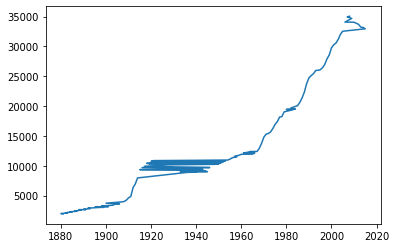

In [112]:
df.year.value_counts().plot()

<AxesSubplot:>

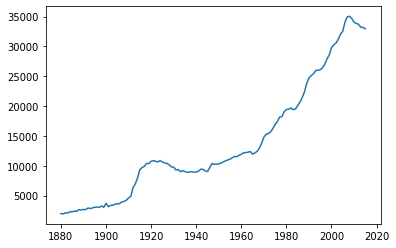

In [114]:
df.year.value_counts().sort_index().plot()

In [115]:
### Exercise
## Which values are there in the 'sex' columns

## Working with text

In [126]:
len('Mary')

4

In [127]:
df['name_length'] = 0

In [128]:
df

,year,name,sex,frequency,name_length
0,1880,Mary,F,7065,0
1,1880,Anna,F,2604,0
2,1880,Emma,F,2003,0
3,1880,Elizabeth,F,1939,0
4,1880,Minnie,F,1746,0
...,...,...,...,...,...
1858431,2015,Zykell,M,5,0
1858432,2015,Zyking,M,5,0
1858433,2015,Zykir,M,5,0
1858434,2015,Zyrus,M,5,0


In [130]:
df['name_length'] = df.name.str.len()

In [131]:
df['name_length'] 

0          4
1          4
2          4
3          9
4          6
          ..
1858431    6
1858432    6
1858433    5
1858434    5
1858435    4
Name: name_length, Length: 1858436, dtype: int64

In [132]:
df.sort_values('name_length')

,year,name,sex,frequency,name_length
96582,1911,Ed,M,164,2
755157,1973,Tj,M,10,2
938867,1983,Ge,M,8,2
1112343,1991,Jr,M,23,2
1112352,1991,Ky,M,23,2
...,...,...,...,...,...
1856815,2015,Christopherjame,M,5,15
1143345,1992,Christopherjohn,M,5,15
1856816,2015,Christopherjose,M,5,15
1044513,1988,Christopherjame,M,5,15


In [133]:
df.sort_values('name_length', ascending=False)

,year,name,sex,frequency,name_length
1756081,2012,Gabrielalexande,M,6,15
1247685,1996,Christianjoseph,M,5,15
1115876,1991,Ryanchristopher,M,8,15
1856816,2015,Christopherjose,M,5,15
1856815,2015,Christopherjame,M,5,15
...,...,...,...,...,...
1708234,2011,Zy,F,6,2
325528,1935,Su,F,6,2
555469,1958,In,F,5,2
1367706,2001,Vi,F,21,2


## Combining conditions

In [123]:
df[df.year.between(1940,1945) & df.sex=='F']

,year,name,sex,frequency


In [121]:
df[(df.year.between(1940,1945)) & (df.sex=='F')]

,year,name,sex,frequency
366194,1940,Mary,F,56196
366195,1940,Barbara,F,36732
366196,1940,Patricia,F,32661
366197,1940,Judith,F,22380
366198,1940,Betty,F,22074
...,...,...,...,...
417450,1945,Zannie,F,5
417451,1945,Zelphia,F,5
417452,1945,Zenaida,F,5
417453,1945,Zilla,F,5


In [ ]:
## Aggregation and Grouping

In [124]:
df.frequency.mean()

183.39796743067828

In [125]:
df.frequency.max()

99680

## Selection and Aggregation

In [134]:
df[df.sex=='M'].name_length.mean()

5.993377308637478

In [135]:
df[df.sex=='F'].name_length.mean()

6.298050944003023

<AxesSubplot:ylabel='Frequency'>

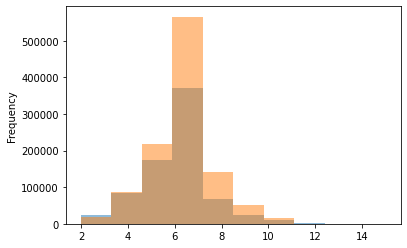

In [137]:
df[df.sex=='M'].name_length.plot(kind='hist',alpha=.5)
df[df.sex=='F'].name_length.plot(kind='hist',alpha=.5)

In [138]:
df.describe()

,year,frequency,name_length
count,1.858436e+06,1.858436e+06,1.858436e+06
mean,1.973379e+03,1.833980e+02,6.173833e+00
std,3.369633e+01,1.555462e+03,1.472731e+00
min,1.880000e+03,5.000000e+00,2.000000e+00
25%,1.950000e+03,7.000000e+00,5.000000e+00
50%,1.983000e+03,1.200000e+01,6.000000e+00
75%,2.002000e+03,3.200000e+01,7.000000e+00
max,2.015000e+03,9.968000e+04,1.500000e+01


### Groupby()

![grouby](https://jakevdp.github.io/PythonDataScienceHandbook/figures/03.08-split-apply-combine.png)

In [141]:
df.groupby('sex').mean()

,year,frequency,name_length
sex,,,
F,1974.081408,153.399132,6.298051
M,1972.359507,226.978468,5.993377


In [142]:
df.groupby('sex')['name_length'].mean()

sex
F    6.298051
M    5.993377
Name: name_length, dtype: float64

In [147]:
by_dec_sex = df.groupby(['year','sex'])['name_length'].mean()
by_dec_sex

year  sex
1880  F      5.773885
      M      5.632923
1881  F      5.750533
      M      5.601406
1882  F      5.805447
               ...   
2013  M      5.999786
2014  F      6.317406
      M      5.981319
2015  F      6.303602
      M      5.974853
Name: name_length, Length: 272, dtype: float64

## Intermezzo: Hierarchical Index

In [161]:
by_dec_sex.loc[1880:1885]

year  sex
1880  F      5.773885
      M      5.632923
1881  F      5.750533
      M      5.601406
1882  F      5.805447
      M      5.646630
1883  F      5.771347
      M      5.620019
1884  F      5.795222
      M      5.633778
1885  F      5.772765
      M      5.643248
Name: name_length, dtype: float64

In [163]:
by_dec_sex.loc[1880:1885,'F']

year  sex
1880  F      5.773885
1881  F      5.750533
1882  F      5.805447
1883  F      5.771347
1884  F      5.795222
1885  F      5.772765
Name: name_length, dtype: float64

<AxesSubplot:xlabel='year'>

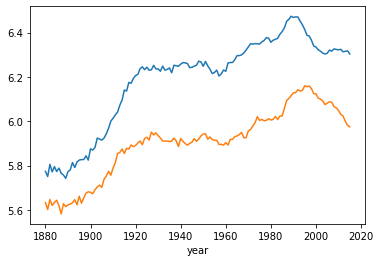

In [165]:
by_dec_sex.loc[:,'F'].plot()
by_dec_sex.loc[:,'M'].plot()

<AxesSubplot:xlabel='year'>

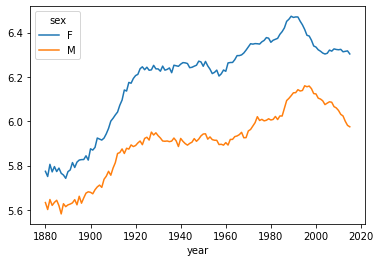

In [167]:
by_dec_sex.unstack().plot()

In [170]:
df.groupby(['year','sex'])['name_length'].agg(['min','max','mean','median'])

min  max      mean  median
year sex                            
1880 F      3   10  5.773885     6.0
     M      2   11  5.632923     6.0
1881 F      2   10  5.750533     6.0
     M      2   11  5.601406     6.0
1882 F      3   10  5.805447     6.0
...       ...  ...       ...     ...
2013 M      2   14  5.999786     6.0
2014 F      2   14  6.317406     6.0
     M      2   15  5.981319     6.0
2015 F      2   14  6.303602     6.0
     M      2   15  5.974853     6.0

[272 rows x 4 columns]

In [171]:
df['end-n'] = df.name.str.endswith('n')

In [172]:
df['end-n']

0          False
1          False
2          False
3          False
4          False
           ...  
1858431    False
1858432    False
1858433    False
1858434    False
1858435    False
Name: end-n, Length: 1858436, dtype: bool

<AxesSubplot:xlabel='year'>

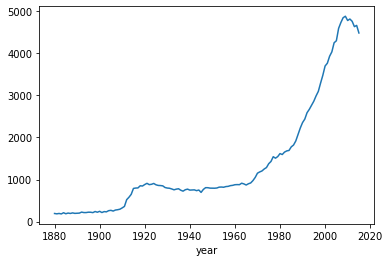

In [189]:
df[df.sex=='M'].groupby('year')['end-n'].sum().plot()

<AxesSubplot:xlabel='year'>

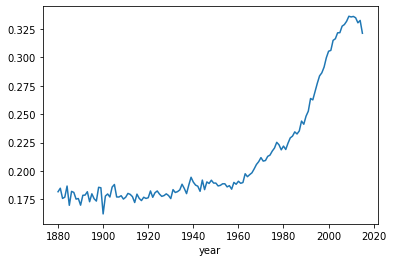

In [190]:
df[df.sex=='M'].groupby('year')['end-n'].mean().plot()

<AxesSubplot:xlabel='year'>

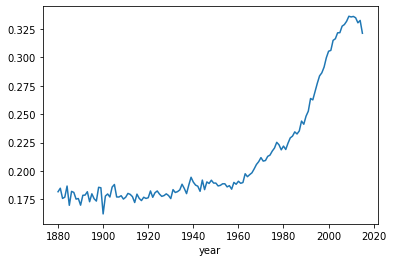

In [191]:
df[df.sex=='M'].groupby('year')['end-n'].apply(lambda x: x.sum() / len(x)).plot()

<AxesSubplot:xlabel='year'>

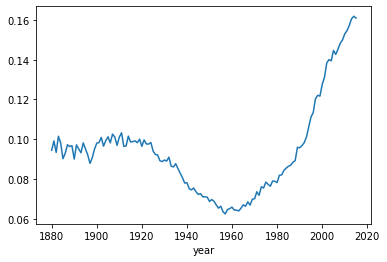

In [192]:
## Exercise
df['starts-a'] = df.name.str.lower().str.startswith('a')
df[df.sex=='F'].groupby('year')['starts-a'].mean().plot()

## Lambda functions

In [187]:
tt = lambda x: len(x) / x.sum()
tt_by_year_sex = df.groupby(['year','sex'])['frequency'].apply(tt)

<AxesSubplot:xlabel='year'>

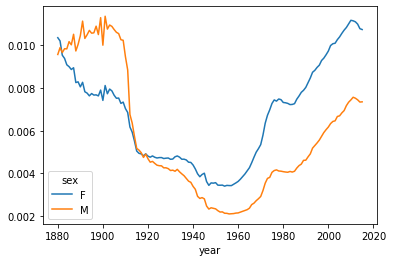

In [188]:
tt_by_year_sex.unstack().plot()

## Victorian Accidents